In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the cleaned dataset
data = pd.read_csv('data.csv')


In [5]:
# Focused columns for visualization
focused_columns = [
    'category_parent_name', 'category_name', 'days', 'backers_count', 
    'pledged', 'converted_pledged_amount', 'goal', 'country', 'state'
]

In [7]:
data = data.rename(columns={
    'category_parent_name': 'parent_category', 
    'category_name': 'sub_category', 
    'pledged': 'pledged_amt',
    'converted_pledged_amount': 'converted_pledged_amt'
})


In [9]:
# Set up plot style
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)


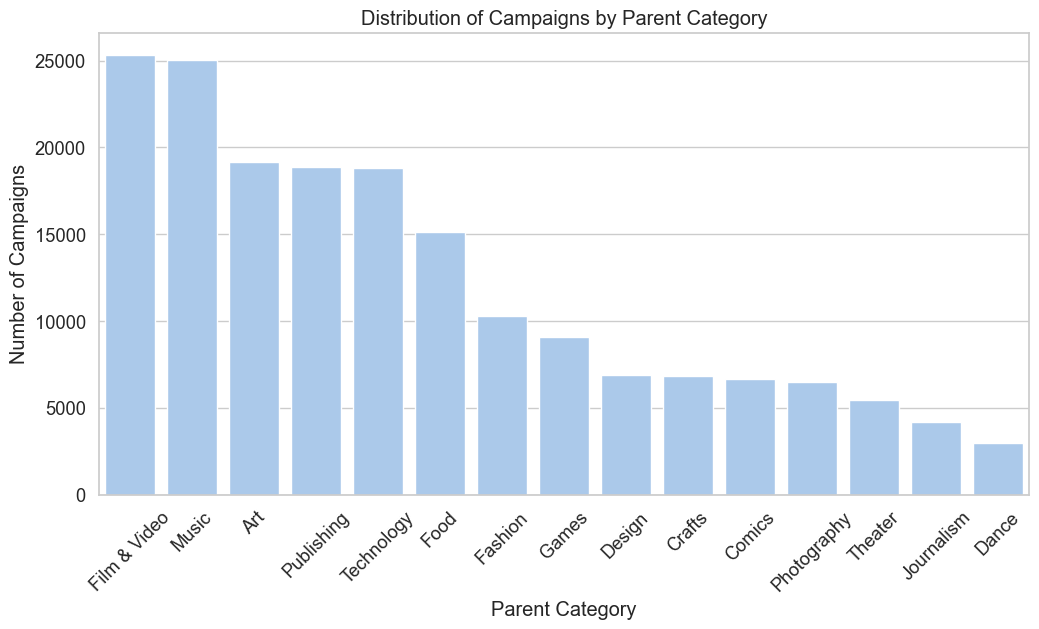

In [60]:
# 1. Category Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="parent_category", 
              order=data["parent_category"].value_counts().index)
plt.title("Distribution of Campaigns by Parent Category")
plt.xlabel("Parent Category")
plt.ylabel("Number of Campaigns")
plt.xticks(rotation=45)
plt.show()

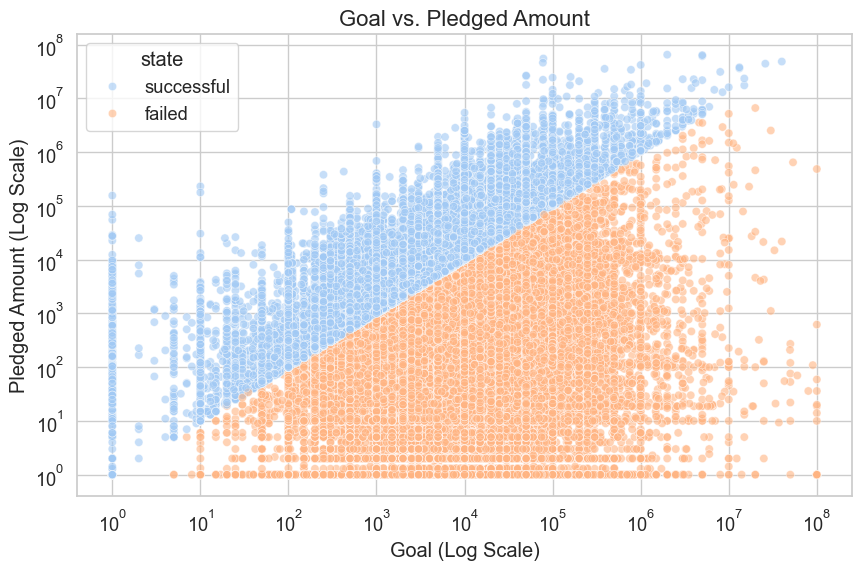

In [62]:
# 2. Goal vs. Pledged Amount Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='goal', y='pledged_amt', hue='state', data=data, alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title('Goal vs. Pledged Amount', fontsize=16)
plt.xlabel('Goal (Log Scale)')
plt.ylabel('Pledged Amount (Log Scale)')
plt.show()

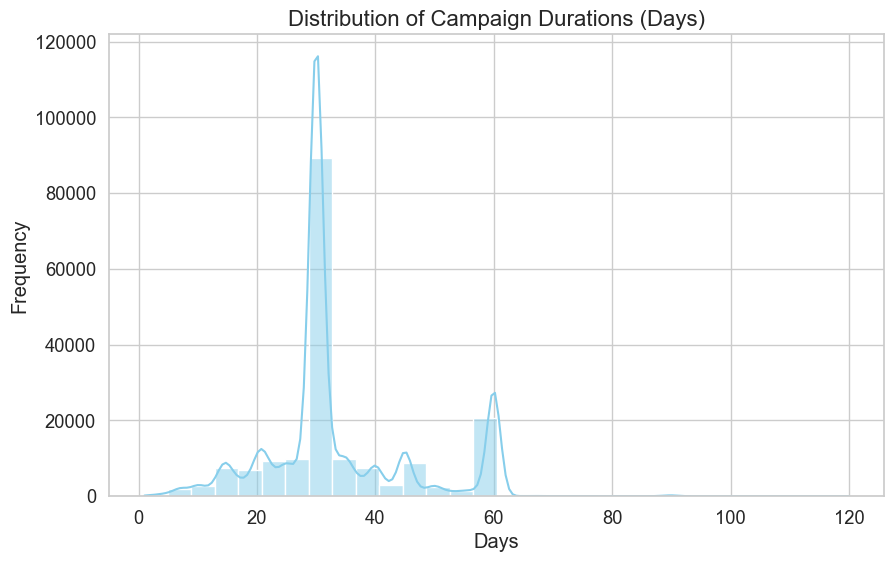

In [66]:
# 3. Duration of Campaigns (Days) Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['days'], kde=True, color="skyblue", bins=30)
plt.title('Distribution of Campaign Durations (Days)', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

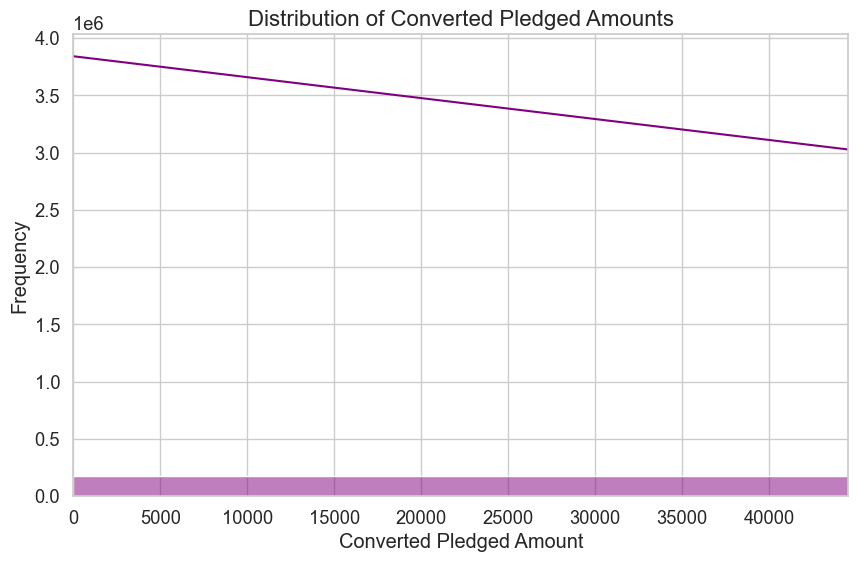

In [68]:
# 4. Converted Pledged Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['converted_pledged_amt'], kde=True, color="purple", bins=50)
plt.xlim(0, data['converted_pledged_amt'].quantile(0.95))
plt.title('Distribution of Converted Pledged Amounts', fontsize=16)
plt.xlabel('Converted Pledged Amount')
plt.ylabel('Frequency')
plt.show()

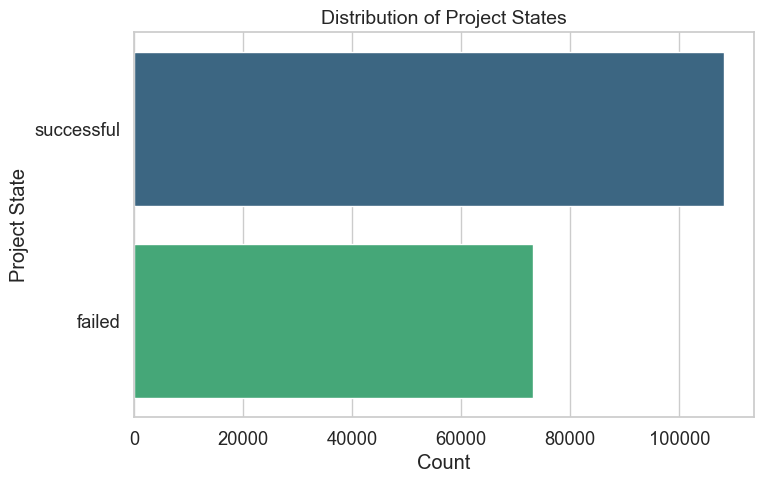

In [70]:
# 5. Distribution of Project States
plt.figure(figsize=(8, 5))
sns.countplot(
    y='state', 
    data=data, 
    order=data['state'].value_counts().index, 
    palette="viridis", 
    hue='state', legend=False
)
plt.title('Distribution of Project States', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Project State')
plt.show()


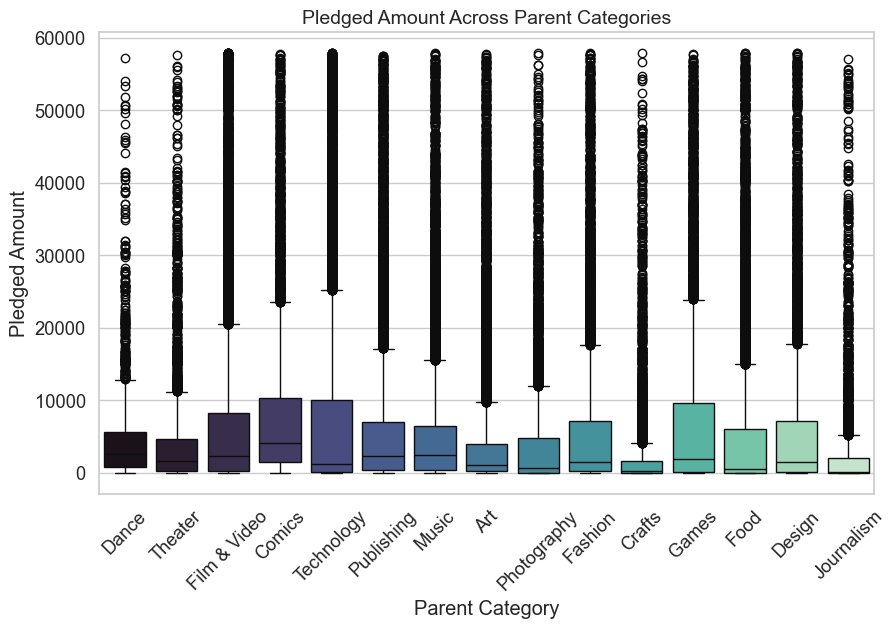

In [72]:
# 6. Pledged Amount vs. Parent Category
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='parent_category', 
    y='pledged_amt', 
    data=data[data['pledged_amt'] <= data['pledged_amt'].quantile(0.95)], # Exclude outliers
    palette="mako", 
    hue='parent_category', dodge=False
)
plt.xticks(rotation=45)
plt.title('Pledged Amount Across Parent Categories', fontsize=14)
plt.xlabel('Parent Category')
plt.ylabel('Pledged Amount')
plt.show()

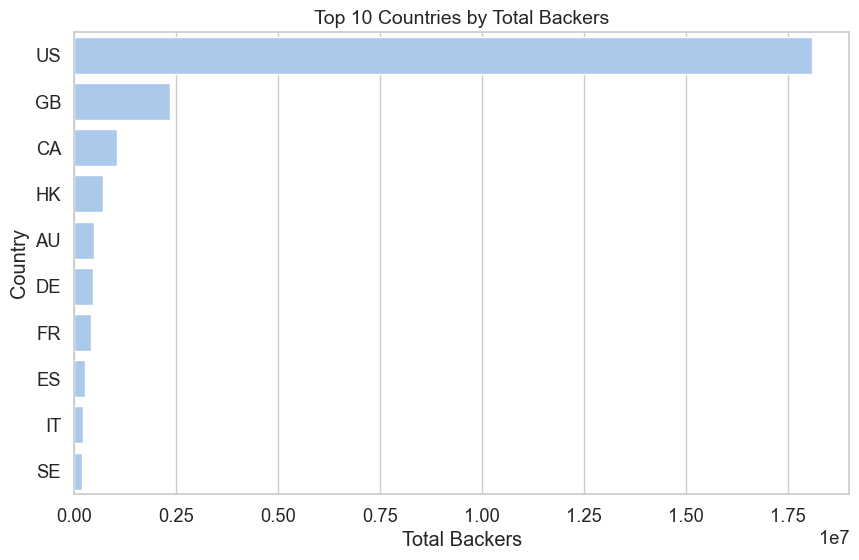

In [74]:
# 7. Backers Count by Country
plt.figure(figsize=(10, 6))
country_backers = data.groupby('country')['backers_count'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=country_backers.values, y=country_backers.index)
plt.title('Top 10 Countries by Total Backers', fontsize=14)
plt.xlabel('Total Backers')
plt.ylabel('Country')
plt.show()

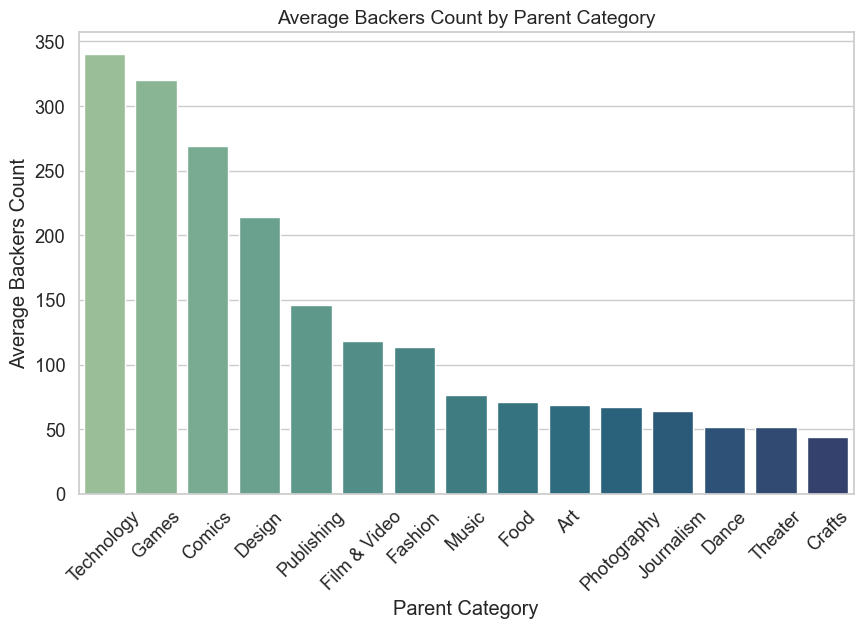

In [76]:
# 8. Backers Count vs. Parent Category
plt.figure(figsize=(10, 6))

# Fix: Assign 'parent_category' to 'hue' and set legend=False
sns.barplot(
    x='parent_category', 
    y='backers_count', 
    data=data.groupby('parent_category', as_index=False)['backers_count']
         .mean()
         .sort_values(by='backers_count', ascending=False), 
    palette="crest",
    hue='parent_category',  # Assign 'hue' to match the x-axis variable
    dodge=False  # Ensure bars do not stack due to 'hue'
)
plt.xticks(rotation=45)
plt.title('Average Backers Count by Parent Category', fontsize=14)
plt.xlabel('Parent Category')
plt.ylabel('Average Backers Count')
plt.legend([], [], frameon=False)  # Hide legend if not needed
plt.show()


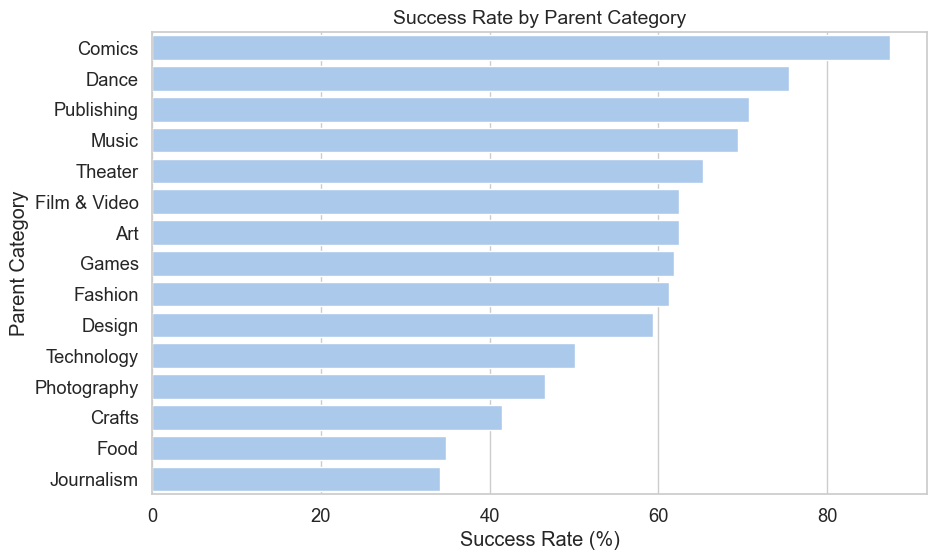

In [78]:
# 9. Success Rate by Parent Category
success_rate = data[data['state'] == 'successful'].groupby('parent_category')['state'].count() / data.groupby('parent_category')['state'].count() * 100
success_rate = success_rate.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=success_rate.values, y=success_rate.index)
plt.title('Success Rate by Parent Category', fontsize=14)
plt.xlabel('Success Rate (%)')
plt.ylabel('Parent Category')
plt.show()


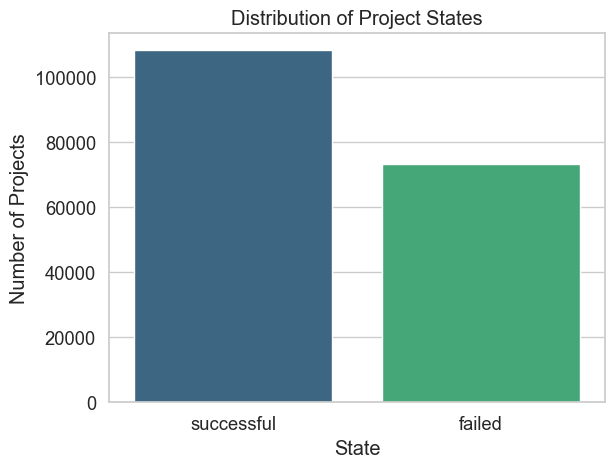

In [80]:
sns.countplot(x='state', data=data, palette='viridis', hue='state', dodge=False, legend=False)
plt.title('Distribution of Project States')
plt.xlabel('State')
plt.ylabel('Number of Projects')
plt.show()


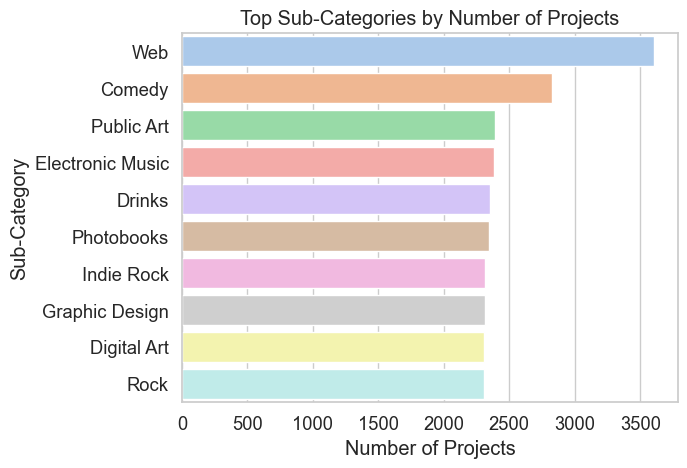

In [82]:
#top sub-Category project
top_categories = data['sub_category'].value_counts().reset_index()
top_categories.columns = ['sub_category', 'count']

sns.barplot(
    data=top_categories.head(10),
    x='count',
    y='sub_category',
    hue='sub_category',
    dodge=False,
    legend=False  # Removes the legend as it is unnecessary
)
plt.title('Top Sub-Categories by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Sub-Category')
plt.show()


In [170]:
print(data.columns)


Index(['backers_count', 'blurb', 'converted_pledged_amt', 'country',
       'country_displayable_name', 'created_at', 'creator', 'currency',
       'current_currency', 'deadline', 'disable_communication', 'fx_rate',
       'goal', 'id', 'is_disliked', 'is_in_post_campaign_pledging_phase',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'location',
       'name', 'percent_funded', 'photo', 'pledged_amt', 'prelaunch_activated',
       'profile', 'slug', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'usd_exchange_rate',
       'usd_pledged', 'usd_type', 'video', 'category_id', 'sub_category',
       'category_analytics_name', 'category_slug', 'category_position',
       'category_parent_id', 'parent_category', 'category_color',
       'category_urls', 'days'],
      dtype='object')


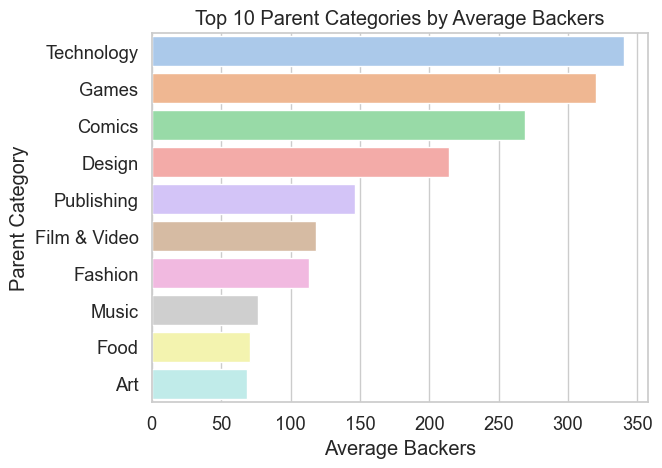

In [84]:
#top 10 country backers avaerage
avg_backers = data.groupby('parent_category', as_index=False)['backers_count'].mean()
avg_backers = avg_backers.sort_values(by='backers_count', ascending=False)

sns.barplot(
    data=avg_backers.head(10),
    x='backers_count',
    y='parent_category',
    hue='parent_category',
    dodge=False,
    legend=False
)
plt.title('Top 10 Parent Categories by Average Backers')
plt.xlabel('Average Backers')
plt.ylabel('Parent Category')
plt.show()


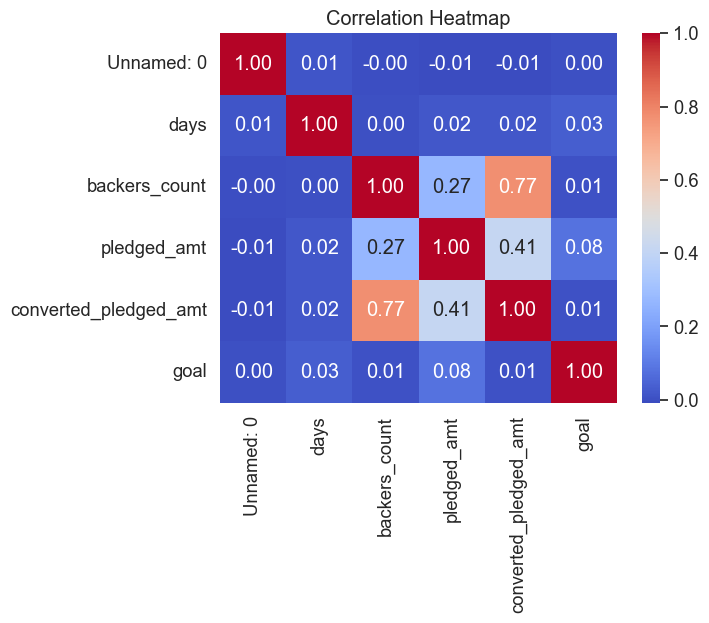

In [86]:
#corellatopn Heat map
numeric_cols = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(numeric_cols, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [198]:
print(data['launched_at'].head())  # Check the first few values


0   2024-11-05 12:27:48
1   2019-05-10 11:05:51
2   2019-05-04 08:50:49
3   2018-07-27 12:54:53
4   2021-03-12 04:45:51
Name: launched_at, dtype: datetime64[ns]


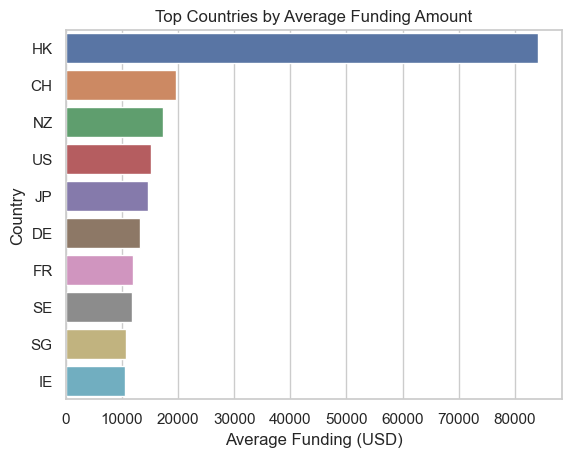

In [184]:
avg_funding = data.groupby('country', as_index=False)['usd_pledged'].mean().sort_values(by='usd_pledged', ascending=False)
sns.barplot(data=avg_funding.head(10), x='usd_pledged', y='country', dodge=False, hue='country', legend=False)
plt.title('Top Countries by Average Funding Amount')
plt.xlabel('Average Funding (USD)')
plt.ylabel('Country')
plt.show()


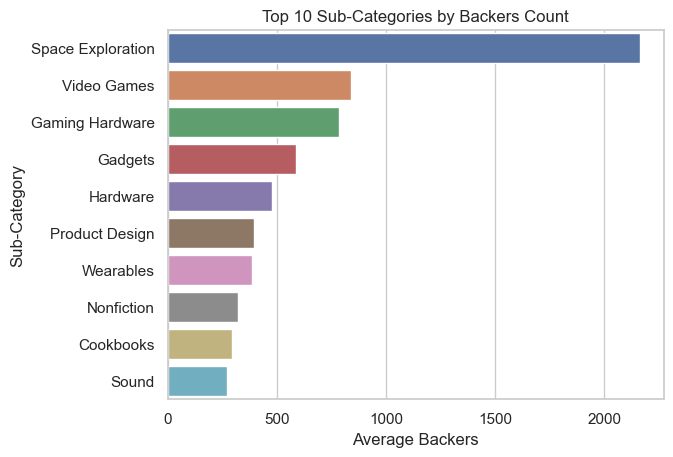

In [188]:
avg_backers = data.groupby('sub_category', as_index=False)['backers_count'].mean().sort_values(by='backers_count', ascending=False)
sns.barplot(data=avg_backers.head(10), x='backers_count', y='sub_category', hue='sub_category', dodge=False, legend=False)
plt.title('Top 10 Sub-Categories by Backers Count')
plt.xlabel('Average Backers')
plt.ylabel('Sub-Category')
plt.show()


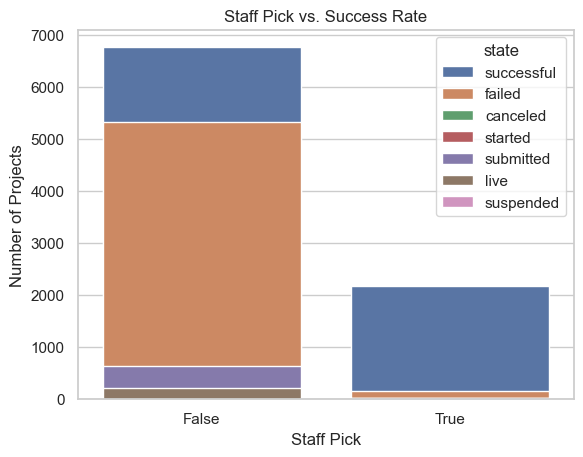

In [194]:
sns.countplot(data=data, x='staff_pick', hue='state', dodge=False)
plt.title('Staff Pick vs. Success Rate')
plt.xlabel('Staff Pick')
plt.ylabel('Number of Projects')
plt.show()


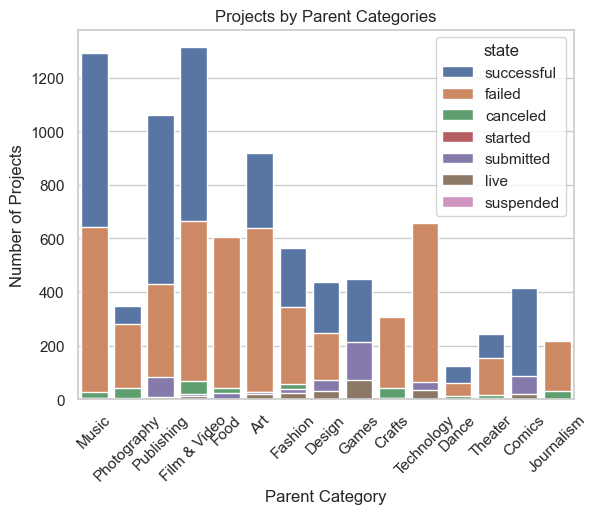

In [196]:
sns.countplot(data=data, x='parent_category', hue='state', dodge=False)
plt.xticks(rotation=45)
plt.title('Projects by Parent Categories')
plt.xlabel('Parent Category')
plt.ylabel('Number of Projects')
plt.show()


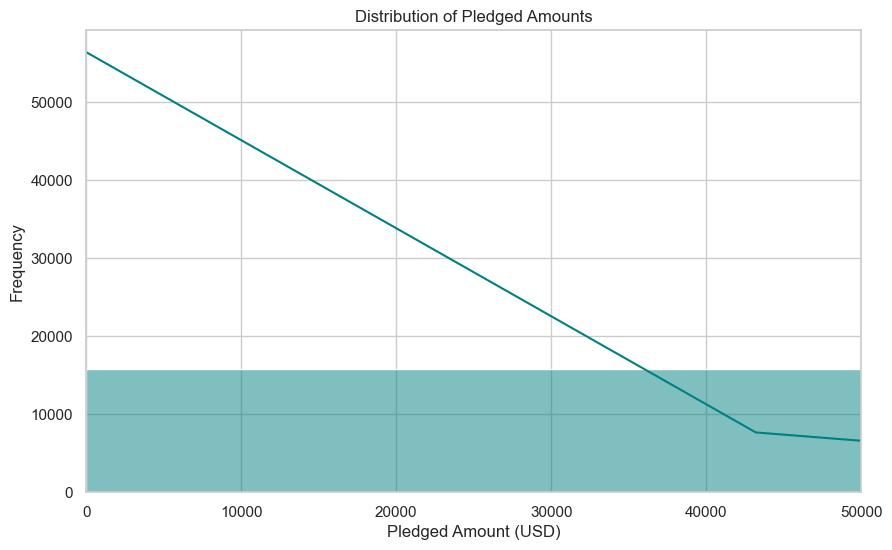

In [214]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='usd_pledged', bins=50, kde=True, color='teal')
plt.title('Distribution of Pledged Amounts')
plt.xlabel('Pledged Amount (USD)')
plt.ylabel('Frequency')
plt.xlim(0, 50000)  # Limit for better visualization
plt.show()


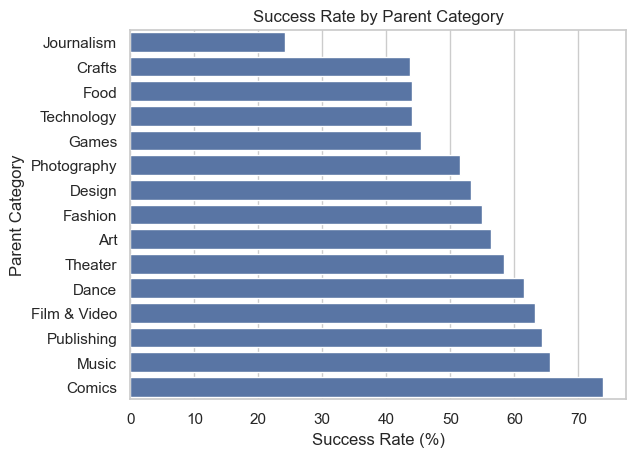

In [225]:
# Calculate success rate
category_success = data.groupby('parent_category', as_index=False).agg(
    total_projects=('state', 'count'),
    successful_projects=('state', lambda x: (x == 'successful').sum())
)
category_success['success_rate'] = (category_success['successful_projects'] / category_success['total_projects']) * 100

# Plot success rates
sns.barplot(data=category_success.sort_values(by='success_rate'), 
            x='success_rate', y='parent_category')
plt.title('Success Rate by Parent Category')
plt.xlabel('Success Rate (%)')
plt.ylabel('Parent Category')
plt.show()


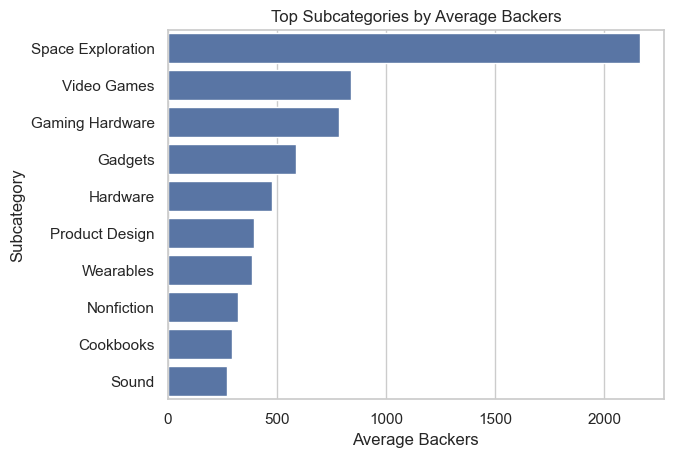

In [229]:
# Calculate average backers per subcategory
avg_backers = data.groupby('sub_category', as_index=False)['backers_count'].mean().sort_values(by='backers_count', ascending=False)

# Plot top 10 subcategories by average backers
sns.barplot(data=avg_backers.head(10), x='backers_count', y='sub_category')
plt.title('Top Subcategories by Average Backers')
plt.xlabel('Average Backers')
plt.ylabel('Subcategory')
plt.show()


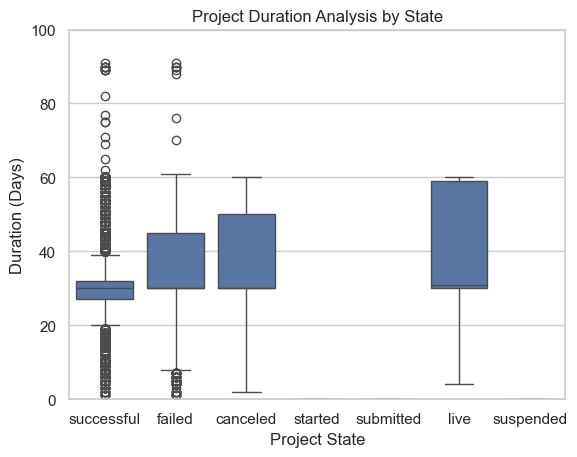

In [233]:
# Calculate project duration
data['duration_days'] = (data['deadline'] - data['launched_at']).dt.days

# Plot duration distribution for successful vs. failed projects
sns.boxplot(data=data, x='state', y='duration_days')
plt.title('Project Duration Analysis by State')
plt.xlabel('Project State')
plt.ylabel('Duration (Days)')
plt.ylim(0, 100)  # Limit for readability
plt.show()


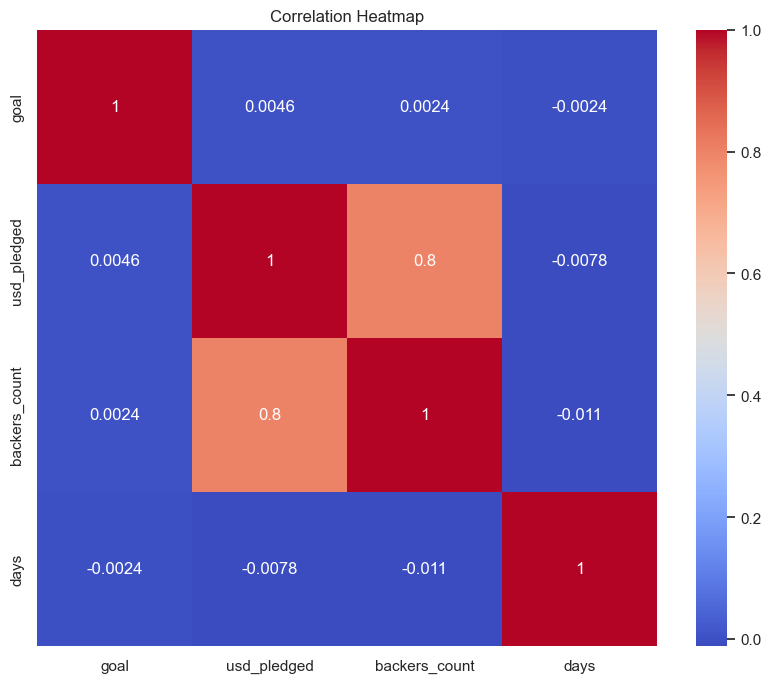

In [237]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[['goal', 'usd_pledged', 'backers_count', 'days']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


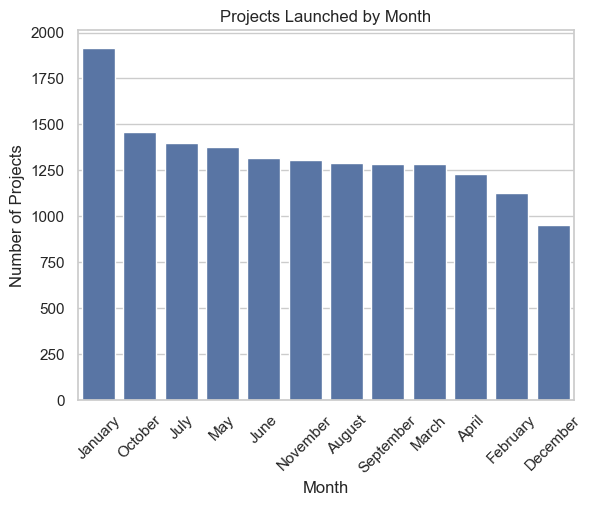

In [241]:
data['launch_month'] = data['launched_at'].dt.month_name()

# Count projects by month
launch_month_count = data['launch_month'].value_counts()

# Plot
sns.barplot(x=launch_month_count.index, y=launch_month_count.values)
plt.title('Projects Launched by Month')
plt.xlabel('Month')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.show()


In [243]:
# Save plots as images if needed
plt.savefig('kickstarter_visualizations_focused.png')


<Figure size 640x480 with 0 Axes>

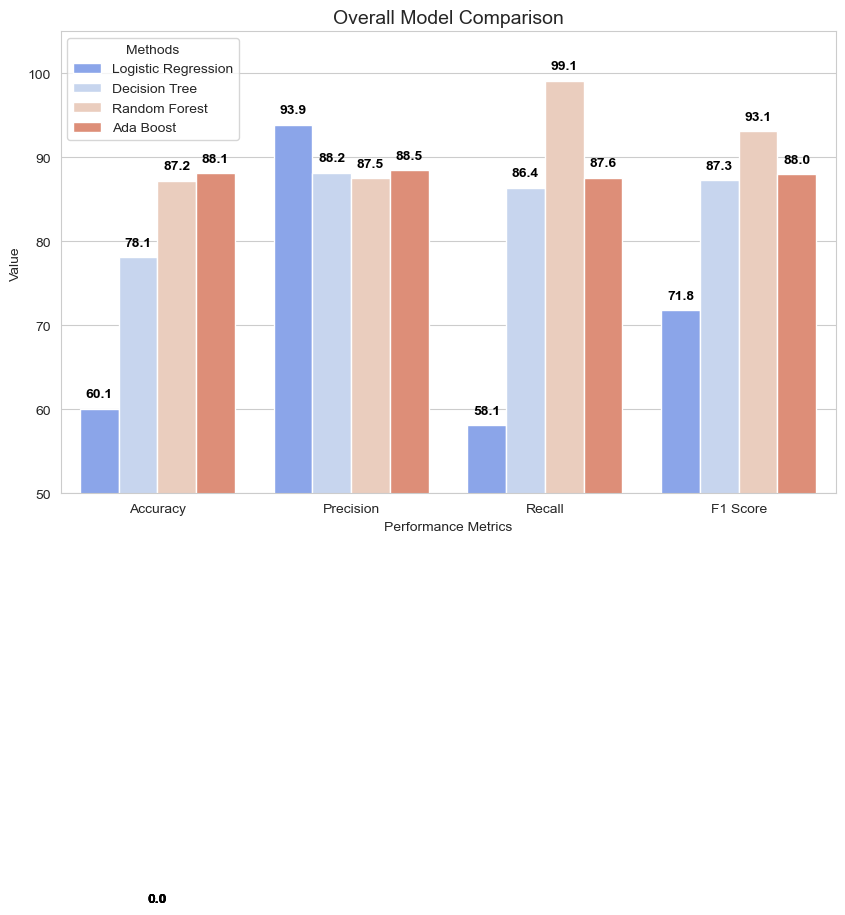

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the table
data = {
    "Methods": ["Logistic Regression", "Decision Tree", "Random Forest", "Ada Boost"],
    "Accuracy": [60.1, 78.1, 87.2, 88.12],
    "Precision": [93.9, 88.2, 87.5, 88.5],
    "Recall": [58.1, 86.4, 99.1, 87.6],
    "F1 Score": [71.8, 87.3, 93.1, 88.0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars="Methods", var_name="Metrics", value_name="Value")

# Set style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Metrics", y="Value", hue="Methods", data=df_melted, palette="coolwarm")

# Add value labels on top of bars
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position
        p.get_height() + 1,  # Y position (slightly above the bar)
        f'{p.get_height():.1f}',  # Value label
        ha='center', va='bottom',  # Centered alignment
        fontsize=10, fontweight='bold', color='black'
    )

# Labels and title
plt.title("Overall Model Comparison", fontsize=14)
plt.ylabel("Value")
plt.xlabel("Performance Metrics")
plt.ylim(50, 105)  # Ensure enough space for labels
plt.legend(title="Methods")

# Show plot
plt.show()


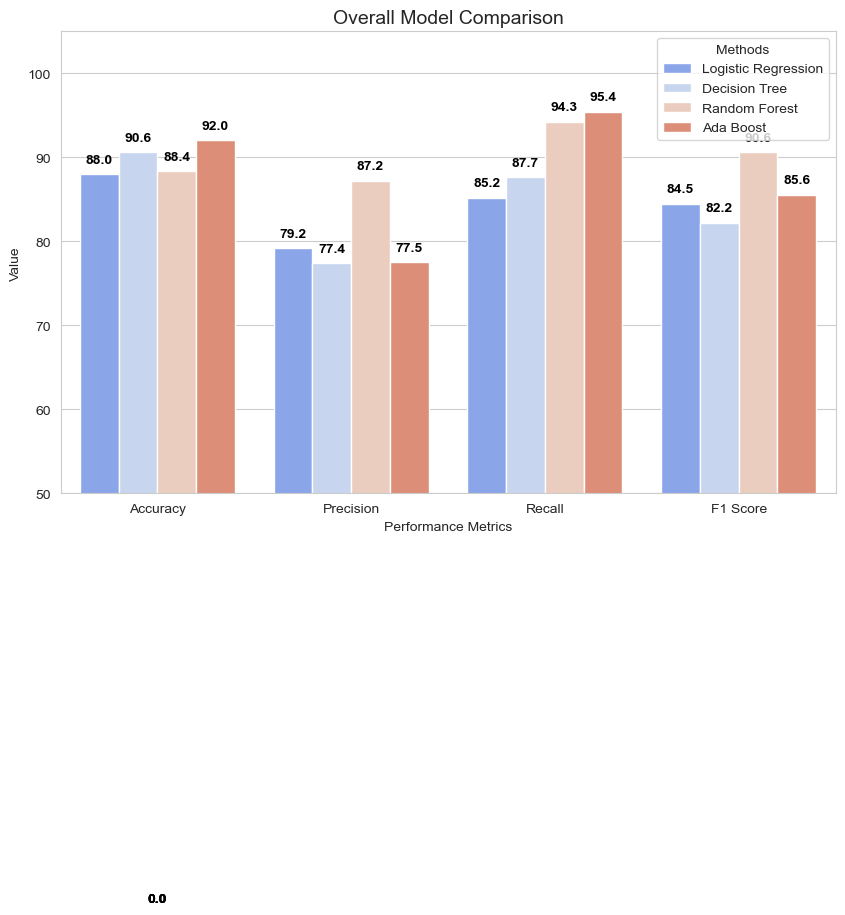

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the table
data = {
    "Methods": ["Logistic Regression", "Decision Tree", "Random Forest", "Ada Boost"],
    "Accuracy": [88, 90.61, 88.36, 92.02],
    "Precision": [79.2, 77.42, 87.22, 77.54],
    "Recall": [85.2, 87.66, 94.27, 95.42],
    "F1 Score": [84.5, 82.22, 90.60, 85.56]
}


# Convert to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars="Methods", var_name="Metrics", value_name="Value")

# Set style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Metrics", y="Value", hue="Methods", data=df_melted, palette="coolwarm")

# Add value labels on top of bars
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position
        p.get_height() + 1,  # Y position (slightly above the bar)
        f'{p.get_height():.1f}',  # Value label
        ha='center', va='bottom',  # Centered alignment
        fontsize=10, fontweight='bold', color='black'
    )

# Labels and title
plt.title("Overall Model Comparison", fontsize=14)
plt.ylabel("Value")
plt.xlabel("Performance Metrics")
plt.ylim(50, 105)  # Ensure enough space for labels
plt.legend(title="Methods")

# Show plot
plt.show()
